In [2]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #For data visualizations

In [3]:
#load dataset
dataset_tr = pd.read_csv('stock_price/Google_Stock_Price_Train.csv')
tr_set = dataset_tr.iloc[:,1:2].values

In [4]:
dataset_tr.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
#Check data shape
dataset_tr.shape

(1258, 6)

<Axes: xlabel='Date'>

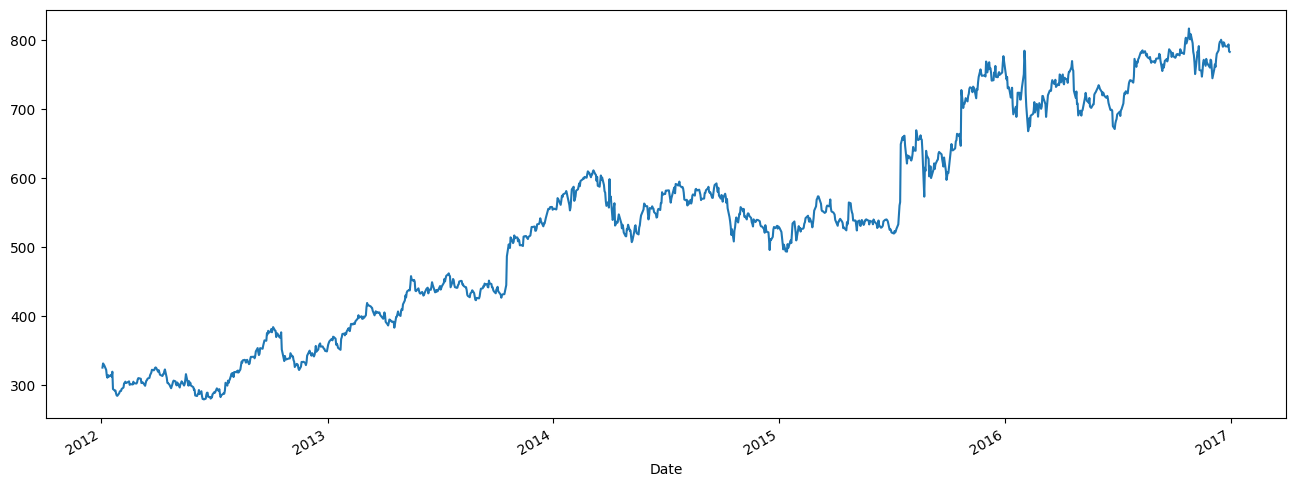

In [6]:
#plot dataset
dataset = pd.read_csv('stock_price/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)
dataset['Open'].plot(figsize=(16,6))


In [7]:
#Performing the feature model to remodel the information
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
tr_set_scaled = sc.fit_transform(tr_set)


In [8]:
#Creating data structure with timestamp value of 60 and one output
X_tr = []
y_tr = []
for i in range(60, 1258):
    X_tr.append(tr_set_scaled[i-60:i,0])
    y_tr.append(tr_set_scaled[i,0])
    
X_tr, y_tr = np.array(X_tr), np.array(y_tr)

In [9]:
#Reshaping the independent variable:
X_tr = np.reshape(X_tr,(X_tr.shape[0],X_tr.shape[1], 1))

In [10]:
#Build RNN model
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# since predicting a continuous value, dealing with continuous values
regressor = Sequential() 
    
#adding first LSTM and dropout to avoid overfitting
# since we are going to add another LSTM layer
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_tr.shape[1], 1))) 
regressor.add(Dropout(0.2))
    
#adding second LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
     
#adding third LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
     
#adding fourth LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50)) 
regressor.add(Dropout(0.2))
    
#adding the output layer
regressor.add(Dense(units=1))

c:\Users\badar\Desktop\VS Studio\Deep Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Compiling RNN model
regressor.compile(optimizer='adam', loss = 'mean_squared_error')   

In [12]:
#Training the model
regressor.fit(X_tr, y_tr, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.1145
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0080
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0062
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0055
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0060
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0039
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0051
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0058
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - l

In [13]:
#Importing the test data and getting the predicted stock price of 2017:
dataset_te = pd.read_csv('stock_price/Google_Stock_Price_Test.csv')
real_stock_price = dataset_te.iloc[:,1:2].values
dataset_total = pd.concat((dataset_tr['Open'],dataset_te['Open']), axis=0)
ip = dataset_total[ len(dataset_total) - len(dataset_te) -60:].values
ip = ip.reshape(-1,1)
ip = sc.transform(ip)

In [14]:
#Reshaping the test dataset
X_te = []

for i in range(60, 80):
    X_te.append(ip[i-60:i,0])

X_te= np.array(X_te)
X_te = np.reshape(X_te,(X_te.shape[0],X_te.shape[1], 1))

predicted_data = regressor.predict(X_te)
predicted_data = sc.inverse_transform(predicted_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


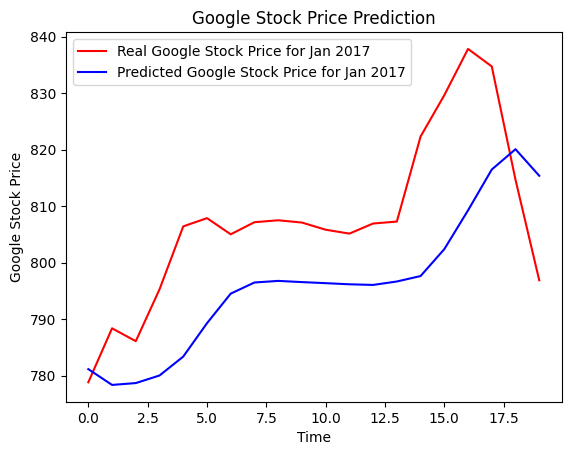

In [15]:
#predicting the stock prices we will generate a plot
plt.plot(real_stock_price,color='red', label='Real Google Stock Price for Jan 2017')
plt.plot(predicted_data,color='blue', label='Predicted Google Stock Price for Jan 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

